In [7]:
import json
import numpy as np

from sncosmo.bandpasses import _BANDPASSES
from astropy.time import Time


def loadEvent(filename):
    """
    Reads in lightcurve data from a file and returns data in a dictionary format.
    
    Args:
    - filename (str): Path to lightcurve file
    
    Returns:
    - data (dict): Dictionary containing the lightcurve data from the file. The keys are generally 't' and each of the filters in the file as well as their accompanying error values.
    """
    if filename.endswith(".json"):
        with open(filename) as f:
            data = json.load(f)
            for key in data.keys():
                data[key] = np.array(data[key])
    else:
        lines = [line.rstrip("\n") for line in open(filename)]
        lines = filter(None, lines)

        sncosmo_filts = [val["name"] for val in _BANDPASSES.get_loaders_metadata()]
        sncosmo_maps = {name: name.replace(":", "_") for name in sncosmo_filts}

        data = {}
        for line in lines:
            lineSplit = line.split(" ")
            lineSplit = list(filter(None, lineSplit))
            mjd = Time(lineSplit[0], format="isot").mjd
            filt = lineSplit[1]

            if filt in sncosmo_maps:
                filt = sncosmo_maps[filt]

            mag = float(lineSplit[2])
            dmag = float(lineSplit[3])

            if filt not in data:
                data[filt] = np.empty((0, 3), float)
            data[filt] = np.append(data[filt], np.array([[mjd, mag, dmag]]), axis=0)

    return data

In [8]:
import pandas as pd
df_ztfrest = pd.read_csv('ZTFReST.csv')
# df_ztfrest

In [3]:
objIds = list(set(df_ztfrest["id"]))
print(objIds)

['ZTF21aaeyldq', 'ZTF21aaafmhn', 'ZTF22aaajecp', 'ZTF22aaazhbd', 'ZTF21abexegc', 'ZTF21aagwbjr', 'ZTF22aaibbvy', 'ZTF22aakhkoc', 'ZTF23aaeiyeq', 'ZTF20achedzl', 'ZTF22abmsaxp', 'ZTF20actbebh', 'ZTF18abantmh', 'ZTF23aaimsja', 'ZTF21accyynu', 'ZTF23aajazzg', 'ZTF23aajadma', 'ZTF23aarlxdf', 'ZTF22abgnxir', 'ZTF22aayluxo', 'ZTF23abbfrqp', 'ZTF23abgsmsg', 'ZTF23aasxbqp', 'ZTF21aagmecm', 'ZTF21acnjzwy', 'ZTF21abhjssj', 'ZTF21aahjuct', 'ZTF21abturbi', 'ZTF22abvvmti', 'ZTF21aajzfoq', 'ZTF21abfmpwn', 'ZTF21abuysnl', 'ZTF22abtopmq', 'ZTF23aagbipz', 'ZTF23absbqun', 'ZTF22aahyqon', 'ZTF23aaixebv', 'ZTF22abdwekt', 'ZTF23aaxzvrr', 'ZTF23aajaxvk', 'ZTF20acqntkr', 'ZTF20aakqxsq', 'ZTF23aagunkc', 'ZTF22aajkkwd', 'ZTF21aapkbav', 'ZTF22aapgcak', 'ZTF20acgigfo', 'ZTF23absajre', 'ZTF22aanbmvf', 'ZTF21aacngji', 'ZTF20aamsouh', 'ZTF23aaemgsd', 'ZTF21abhywxv', 'ZTF21accyvib', 'ZTF21aabtdut', 'ZTF21aaarlbp', 'ZTF21aaczajl', 'ZTF20acpjgkt', 'ZTF23aaksqdp', 'ZTF21aciosfu', 'ZTF23abnpdod', 'ZTF23abrzabc', 'ZTF23a

In [4]:
import os
import json
import numpy as np

dataDir = "data/"
objId = "ZTF23abhxvun"
objDirectory = os.path.join(dataDir, objId)

photometryFile = os.path.join(objDirectory, 'photometry.json')
with open(photometryFile) as f:
    photometry = json.load(f)

spectraFile = os.path.join(objDirectory, 'spectra.json')
with open(spectraFile) as f:
    spectra = json.load(f)

In [12]:
import os
import json

data_folder = 'data/'
photometry_dict = {}

for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file == 'photometry.json':
            folder_name = os.path.basename(root)
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                photometry_dict[folder_name] = json.load(f)


In [15]:
photometry_dict.keys()

dict_keys(['ZTF23abrzabc', 'ZTF21acnjzwy', 'ZTF22absxjze', 'ZTF23aamibcp', 'ZTF20abmvjda', 'ZTF19accxzsc', 'ZTF20acgiglu', 'ZTF20abwzqzo', 'ZTF23aajaxvk', 'ZTF23abbfrqp', 'ZTF19acsakuv', 'ZTF21accyvib', 'ZTF18abvkmgw', 'ZTF21aaafmhn', 'ZTF18abffyqp', 'ZTF21aaeyldq', 'ZTF22abjibjf', 'ZTF21aabxjqr', 'ZTF23aaeiyeq', 'ZTF23aamhlcz', 'ZTF22abgaqwq', 'ZTF20acigmelm', 'ZTF22aajrrzz', 'ZTF23aajazzg', 'ZTF20aazchcq', 'ZTF19abrpfps', 'ZTF22aaibbvy', 'ZTF19abfarpa', 'ZTF21aaivnap', 'ZTF20aaxhzhc', 'ZTF23abcynsv', 'Swift-J181727.0-192921', 'ZTF23aagunkc', 'ZTF22abtopmq', 'ZTF22abzucul', 'ZTF24aahkzvn', 'ZTF19abacxod', 'ZTF18aalrxas', 'ZTF20actoqra', 'ZTF23aaimsja', 'ZTF20aaelulum', 'ZTF22abmsaxp', 'ZTF18abantmh', 'ZTF22abwooun', 'ZTF19aaojovs', 'ZTF21aacwrno', 'ZTF23aaeozpp', 'ZTF21abhjssj', 'ZTF20ababxjv', 'ZTF23aaksqdp', 'ZTF21abinaiu', 'ZTF23aaenmcm', 'ZTF23aalmfej', 'ZTF23aavtwvs', 'ZTF20acylyct', 'ZTF21aaquyjp', 'ZTF23aaayvkz', 'ZTF20acpjgkt', 'ZTF20acwbcsj', 'ZTF19aapuudk', 'ZTF20aajnksq', '

In [36]:
lc_dict = {key: pd.DataFrame.from_dict(val) for key, val in photometry_dict.items()}

display(lc_dict[list(lc_dict.keys())[0]].head())
lc_dict[list(lc_dict.keys())[0]][lc_dict[list(lc_dict.keys())[0]]['filter'] == 'ztfg']

,obj_id,ra,dec,filter,mjd,snr,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,altdata,created_at,groups,annotations,mag,magerr,magsys,limiting_mag
0,ZTF23abrzabc,NaN,NaN,ztfg,60254.182674,NaN,1,ZTF,None,None,None,518523602,None,2023-12-06T04:13:55.902742,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.7789
1,ZTF23abrzabc,NaN,NaN,ztfg,60254.196146,NaN,1,ZTF,None,None,None,518523587,None,2023-12-06T04:13:55.689135,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.8071
2,ZTF23abrzabc,NaN,NaN,ztfg,60254.223056,NaN,1,ZTF,None,None,None,518523603,None,2023-12-06T04:13:55.902798,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.8843
3,ZTF23abrzabc,NaN,NaN,ztfr,60254.245729,NaN,1,ZTF,None,None,None,518523588,None,2023-12-06T04:13:55.689189,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.6873
4,ZTF23abrzabc,NaN,NaN,ztfr,60254.247026,NaN,1,ZTF,None,None,None,518523604,None,2023-12-06T04:13:55.902818,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.6964


,obj_id,ra,dec,filter,mjd,snr,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,altdata,created_at,groups,annotations,mag,magerr,magsys,limiting_mag
0,ZTF23abrzabc,NaN,NaN,ztfg,60254.182674,NaN,1,ZTF,None,None,None,518523602,None,2023-12-06T04:13:55.902742,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.778900
1,ZTF23abrzabc,NaN,NaN,ztfg,60254.196146,NaN,1,ZTF,None,None,None,518523587,None,2023-12-06T04:13:55.689135,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.807100
2,ZTF23abrzabc,NaN,NaN,ztfg,60254.223056,NaN,1,ZTF,None,None,None,518523603,None,2023-12-06T04:13:55.902798,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.884300
6,ZTF23abrzabc,NaN,NaN,ztfg,60255.182465,NaN,1,ZTF,None,None,None,518523606,None,2023-12-06T04:13:55.902849,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.659500
11,ZTF23abrzabc,NaN,NaN,ztfg,60257.311609,NaN,1,ZTF,None,None,None,518523610,None,2023-12-06T04:13:55.902908,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.111500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,ZTF23abrzabc,NaN,NaN,ztfg,60324.152164,NaN,1,ZTF,None,None,None,534171024,None,2024-01-17T05:21:55.181945,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,19.087500
201,ZTF23abrzabc,23.224883,30.360591,ztfg,60326.260081,4.821701,1,ZTF,None,None,None,534670781,None,2024-01-18T03:57:48.508609,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],19.582199,0.225177,ab,19.542775
202,ZTF23abrzabc,23.224905,30.360666,ztfg,60326.261493,4.938217,1,ZTF,None,None,None,534670783,None,2024-01-18T03:57:48.781253,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],19.688200,0.219864,ab,19.674701
203,ZTF23abrzabc,NaN,NaN,ztfg,60326.275428,NaN,1,ZTF,None,None,None,534670784,None,2024-01-18T03:57:48.781289,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,19.223400


In [33]:
## max value in ztfg for each object
max_ztfg = {key: val[val['filter'] == 'ztfg']['mag'].max() for key, val in lc_dict.items()}
max_ztfg

KeyError: False

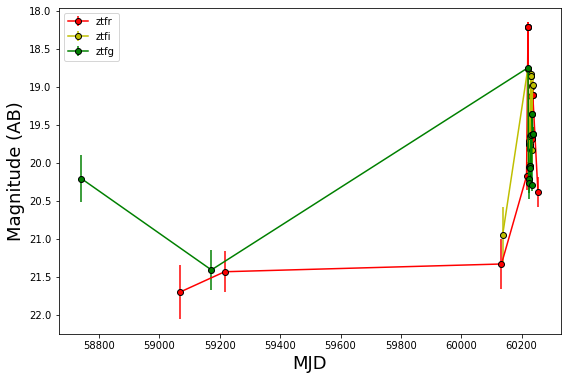

In [5]:
import matplotlib.pyplot as plt

color_dict = {'ztfg': 'green', 'ztfr': 'red', 'ztfi': 'y',
              'sdssg': 'green', 'sdssr': 'red', 'sdssi': 'y',
              'atlasc': 'cyan', 'atlaso': 'orange',}

def plot_photometry(lc):

    
    fig, ax1 = plt.subplots(1, 1, figsize=(9,6))
    ymin, ymax = np.inf, -np.inf

    for f in set(lc['filter']):
        tf = lc[lc['filter'] == f]
        
        tf_det = tf[tf['mag'] >= 3.]
        tf_ul = tf[tf['snr'] < 3]

        ax1.errorbar(tf_det['mjd'].values,
                     tf_det['mag'], yerr=tf_det['magerr'],
                     color=color_dict[f], markeredgecolor='k',
                     label=f, marker='o')
        if np.min(tf_det['mag']) < ymin:
            ymin = np.min(tf_det['mag'])
        if np.max(tf_det['mag']) > ymax:
            ymax = np.max(tf_det['mag'])

        if len(tf_ul) != 0:
            ax1.errorbar(tf_ul['mjd'].values, tf_ul['limiting_mag'],
                         markeredgecolor=color_dict[f],
                         markerfacecolor='w', fmt='v')
            plt.plot([],[], 'kv', markeredgecolor='k', markerfacecolor='w',
                     label='upper limits')

            if np.min(tf_det['limiting_mag']) < ymin:
                ymin = np.min(tf_det['limiting_mag'])
            if np.max(tf_det['limiting_mag']) > ymax:
                ymax = np.max(tf_det['limiting_mag'])
    
    plt.gca().invert_yaxis()

    ax1.set_xlabel(f"MJD", fontsize=18)
    ax1.set_ylabel("Magnitude (AB)", fontsize=18)
    plt.legend()

lc = pd.DataFrame.from_dict(photometry)
plot_photometry(lc)

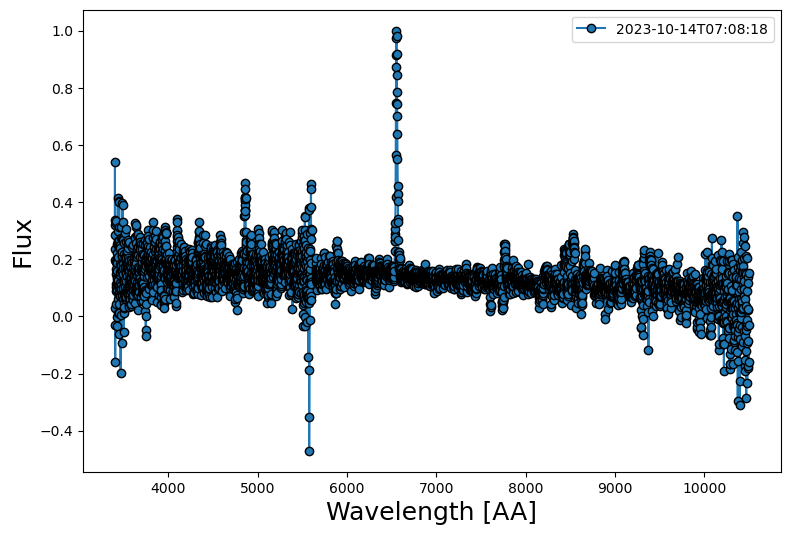

In [7]:
import matplotlib.pyplot as plt

def plot_spectra(spec):

    
    fig, ax1 = plt.subplots(1, 1, figsize=(9,6))
    ymin, ymax = np.inf, -np.inf

    for index, row in spec.iterrows():
        
        wavelength = row['wavelengths']
        flux = np.array(row['fluxes'], dtype=np.float64)
        fluxerr = np.array(row['errors'], dtype=np.float64)
        observed_at = row['observed_at']
        
        norm = np.nanmax(flux)
        flux = flux / norm
        fluxerr = fluxerr / norm

        ax1.errorbar(wavelength,
                     flux,
                     markeredgecolor='k',
                     label=observed_at, marker='o')
        if np.nanmin(flux) < ymin:
            ymin = np.nanmin(flux)
        if np.nanmax(flux) > ymax:
            ymax = np.nanmax(flux)

    ax1.set_xlabel(f"Wavelength [AA]", fontsize=18)
    ax1.set_ylabel("Flux", fontsize=18)
    plt.legend()

spec = pd.DataFrame.from_dict(spectra['spectra'])
plot_spectra(spec)